# Load libraries

In [1]:
#pragma nodebook off
#Use nodebook for better reproducibility https://github.com/uoa-eResearch/nodebook
%reload_ext nodebook.ipython
%nodebook disk train

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd # Tabular data
import numpy as np # Numerical operations
import geopandas as gpd # Vector geospatial operations
import contextily as ctx # Used for contextual basemaps
import seaborn # Plotting
seaborn.set()
import matplotlib.pyplot as plt # Plotting
import os # File system operations
import zipfile # ZIP file operations
from glob import glob # Recursive file lookup
from unidecode import unidecode # Remove macrons
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
# ML stuff
import sklearn.ensemble
import sklearn.linear_model
from sklearn.multioutput import MultiOutputRegressor
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

plt.rcParams['figure.figsize'] = (20, 20) # Large plots by default

In [ ]:
glob("input/**/*", recursive=True)

['input/subnational-population-projections-2018base-2048.xlsx',
 'input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip',
 'input/hospital_discharges',
 'input/total_household_income_2013_2018_census_by_DHB.xlsx',
 'input/statsnzdistrict-health-board-2015-FGDB.zip',
 'input/NZ_Public_Hospitals.geojson',
 'input/hospital_discharges/pubfund2016_17data.zip',
 'input/hospital_discharges/pubfund2015_16data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip']

# Load data

In [ ]:
DHB = gpd.read_file("input/statsnzdistrict-health-board-2015-FGDB.zip!district-health-board-2015.gdb")
DHB = DHB[DHB.DHB2015_Name != "Area outside District Health Board"]
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336..."
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921..."
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708..."
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889..."
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819..."
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391..."
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876..."
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412..."


In [ ]:
hosp = gpd.read_file("input/NZ_Public_Hospitals.geojson")
hosp

,Premises_Name,Certification_Service_Type,Service_Types,Total_Beds,Premises_Website,Premises_Address_Other,Premises_Address,Premises_Address_Suburb_Road,Premises_Address_Town_City,Premises_Address_Post_Code,...,Legal_Entity_Address_Suburb_Roa,Legal_Entity_Address_Town_City,Legal_Entity_Address_Post_Code,Legal_Entity_Postal_Address,Legal_Entity_Postal_Address_Sub,Legal_Entity_Postal_Address_Tow,Legal_Entity_Postal_Address_Pos,Legal_Entity_Website,ObjectId,geometry
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1124,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,1,POINT (174.76948 -36.86089)
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,2,POINT (174.76948 -36.86089)
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,None,None,27 Sutherland Road,Point Chevalier,Auckland,1025,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,3,POINT (174.71239 -36.87277)
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,None,None,214 Green Lane West,Epsom,Auckland,1051,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,4,POINT (174.77965 -36.89332)
4,Opotiki Health Care Centre,Public Hospital,"Maternity, Surgical, Medical",6,None,None,32A King Street,None,Opotiki,3122,...,None,Tauranga,3112,Private Bag 12024,None,Tauranga,3143,None,5,POINT (177.28553 -38.00635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Waitakere Hospital,Public Hospital,"Geriatric, Childrens health, Surgical, Mental ...",283,None,None,55 Lincoln Road,Henderson,Auckland,0610,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,79,POINT (174.62866 -36.86952)
79,Wilson Centre,Public Hospital,"Physical, Childrens health",26,None,None,1 St Leonards Road,Hauraki,Auckland,0622,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,80,POINT (174.78800 -36.79983)
80,Buller Health,Public Hospital,"Maternity, Medical",8,None,None,45 Derby Street,None,Westport,7825,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,81,POINT (171.60491 -41.74922)
81,Grey Base Hospital,Public Hospital,"Dementia care, Geriatric, Mental health, Child...",114,None,None,71 Water Walk Road,None,Greymouth,7805,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,82,POINT (171.19210 -42.46327)


In [ ]:
TALB = gpd.read_file("input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip!territorial-authority-local-board-2021-clipped-generalised.gdb")
TALB = TALB[TALB.TALB2021_V1_00_NAME_ASCII != "Area Outside Territorial Authority"]
TALB

,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439..."
1,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530..."
2,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
3,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
4,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249..."
...,...,...,...,...,...,...,...
82,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
83,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657..."
84,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694..."
85,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725..."


In [ ]:
# From https://www.stats.govt.nz/information-releases/subnational-population-projections-2018base2048#map
pop = pd.concat(pd.read_excel(
    "input/subnational-population-projections-2018base-2048.xlsx",
    sheet_name=["Table 5", "Table 6"],
    skiprows=5,
    usecols="A:G,L",
    names=["area", "year", "0-14", "15-39", "40-64", "65+", "total", "median age"],
    engine='openpyxl'
))
# Drop notes
pop.dropna(subset=["year"], inplace=True)
# Fill area forward
pop.area.fillna(method="ffill", inplace=True)
pop.reset_index(inplace=True)
pop.area.replace("Maungakiekie-Tamaki local board area", "Maungakiekie-Tāmaki local board area", inplace=True)
pop.area.replace("Great Barrier local board area", "Aotea/Great Barrier local board area", inplace=True)
# Fix up dtypes
cols = ["0-14", "15-39", "40-64", "65+", "total"]
pop[cols] = pop[cols].astype(int)
pop.year = pop.year.astype(int).astype(str)
pop

,level_0,level_1,area,year,0-14,15-39,40-64,65+,total,median age
0,Table 5,0,Far North district,1996,15200,17700,15600,6100,54500,33.4
1,Table 5,1,Far North district,2001,14900,16400,18100,7000,56400,36.3
2,Table 5,2,Far North district,2006,13800,15700,20000,7900,57500,39.0
3,Table 5,3,Far North district,2013,13800,15100,21300,10500,60600,42.0
4,Table 5,4,Far North district,2018,14500,17600,22800,13000,67900,42.8
...,...,...,...,...,...,...,...,...,...,...
963,Table 6,226,Franklin local board area,2028,17800,30000,30600,18500,96900,40.5
964,Table 6,227,Franklin local board area,2033,19700,33400,33800,22500,109400,41.0
965,Table 6,228,Franklin local board area,2038,22100,36100,37500,26300,122000,41.6
966,Table 6,229,Franklin local board area,2043,24300,38500,42600,29100,134500,42.2


In [ ]:
popyears = pop.year.unique()
popyears

array(['1996', '2001', '2006', '2013', '2018', '2023', '2028', '2033',
       '2038', '2043', '2048'], dtype=object)

<AxesSubplot:xlabel='year'>

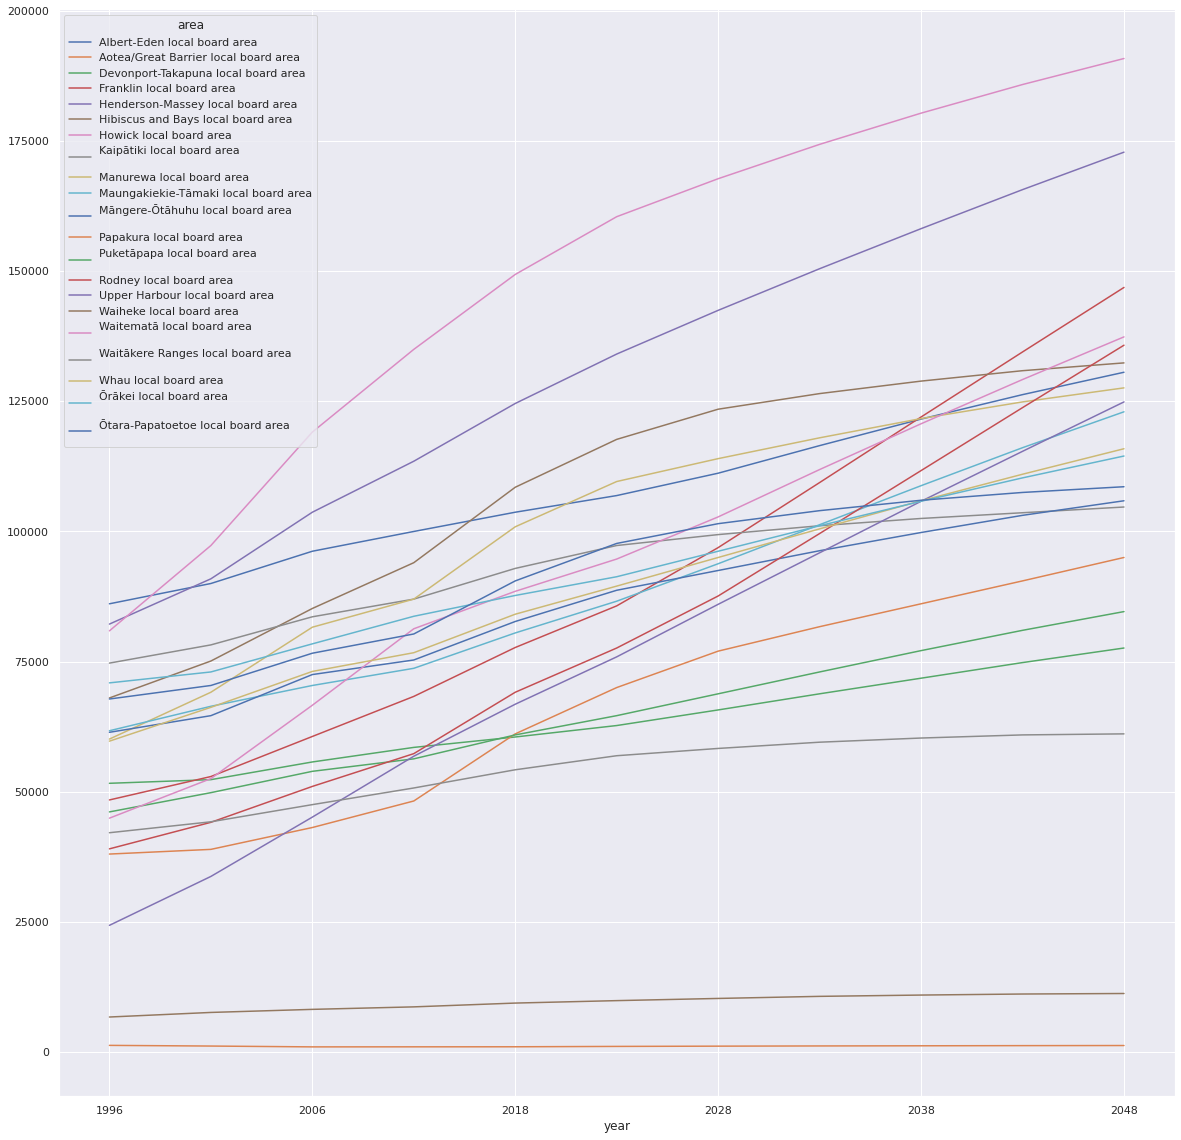

In [ ]:
pop[pop.area.str.contains("local")].pivot(index='year', columns='area', values='total').plot()

In [ ]:
# Restructure population data so we have one row per area, and all population projections in columns
rows = []
for area in pop.area.unique():
    row = {"area": area}
    for year in pop.year.unique():
        for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
            new_col = f"pop_{year}_{c}"
            value = pop.loc[(pop.year == year) & (pop.area == area), c].iloc[0]
            row[new_col] = value
    rows.append(row)
pop = pd.DataFrame(rows)
pop

,area,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North district,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangārei district\n,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara district,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Auckland,255600,451400,296500,112300,1115800,32.1,277800,469900,351000,...,717000,402500,2207800,40.5,353000,754000,761900,434000,2302900,41.3
4,Thames-Coromandel district,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Māngere-Ōtāhuhu local board area\n,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
84,Ōtara-Papatoetoe local board area\n,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
85,Manurewa local board area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
86,Papakura local board area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
cols = pop.columns[pop.columns!="area"].tolist()
cols

['pop_1996_0-14',
 'pop_1996_15-39',
 'pop_1996_40-64',
 'pop_1996_65+',
 'pop_1996_total',
 'pop_1996_median age',
 'pop_2001_0-14',
 'pop_2001_15-39',
 'pop_2001_40-64',
 'pop_2001_65+',
 'pop_2001_total',
 'pop_2001_median age',
 'pop_2006_0-14',
 'pop_2006_15-39',
 'pop_2006_40-64',
 'pop_2006_65+',
 'pop_2006_total',
 'pop_2006_median age',
 'pop_2013_0-14',
 'pop_2013_15-39',
 'pop_2013_40-64',
 'pop_2013_65+',
 'pop_2013_total',
 'pop_2013_median age',
 'pop_2018_0-14',
 'pop_2018_15-39',
 'pop_2018_40-64',
 'pop_2018_65+',
 'pop_2018_total',
 'pop_2018_median age',
 'pop_2023_0-14',
 'pop_2023_15-39',
 'pop_2023_40-64',
 'pop_2023_65+',
 'pop_2023_total',
 'pop_2023_median age',
 'pop_2028_0-14',
 'pop_2028_15-39',
 'pop_2028_40-64',
 'pop_2028_65+',
 'pop_2028_total',
 'pop_2028_median age',
 'pop_2033_0-14',
 'pop_2033_15-39',
 'pop_2033_40-64',
 'pop_2033_65+',
 'pop_2033_total',
 'pop_2033_median age',
 'pop_2038_0-14',
 'pop_2038_15-39',
 'pop_2038_40-64',
 'pop_2038_65+',

In [ ]:
pop.area.tolist()

['Far North district',
 'Whangārei district\n',
 'Kaipara district',
 'Auckland',
 'Thames-Coromandel district',
 'Hauraki district',
 'Waikato district',
 'Matamata-Piako district',
 'Hamilton city',
 'Waipa district',
 'Ōtorohanga district\n',
 'South Waikato district',
 'Waitomo district',
 'Taupō district\n',
 'Western Bay of Plenty district',
 'Tauranga city',
 'Rotorua district',
 'Whakatāne district\n',
 'Kawerau district',
 'Ōpōtiki district\n',
 'Gisborne district',
 'Wairoa district',
 'Hastings district',
 'Napier city',
 "Central Hawke's Bay district",
 'New Plymouth district',
 'Stratford district',
 'South Taranaki district',
 'Ruapehu district',
 'Whanganui district',
 'Rangitikei district',
 'Manawatū district\n',
 'Palmerston North city',
 'Tararua district',
 'Horowhenua district',
 'Kapiti Coast district',
 'Porirua city',
 'Upper Hutt city',
 'Lower Hutt city',
 'Wellington city',
 'Masterton district',
 'Carterton district',
 'South Wairarapa district',
 'Tasman di

In [ ]:
def normalise(string):
    return unidecode(string.lower().strip())
# Augment TALB geodataframe with population information
TALB = pd.merge(TALB,
               pop,
               left_on=TALB.TALB2021_V1_00_NAME.apply(normalise),
               right_on=pop.area.map(normalise),
               how="left")
TALB[["TALB2021_V1_00_NAME"] + cols]

,TALB2021_V1_00_NAME,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North District,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangarei District,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara District,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Thames-Coromandel District,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
4,Hauraki District,5000,6250,5100,2250,18550,33.5,4550,5150,5700,...,6200,8200,22100,54.6,3200,4300,6100,8200,21800,55.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Māngere-Ōtāhuhu Local Board Area,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
83,Ōtara-Papatoetoe Local Board Area,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
84,Manurewa Local Board Area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
85,Papakura Local Board Area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
assert all(~TALB.isna())

<AxesSubplot:>

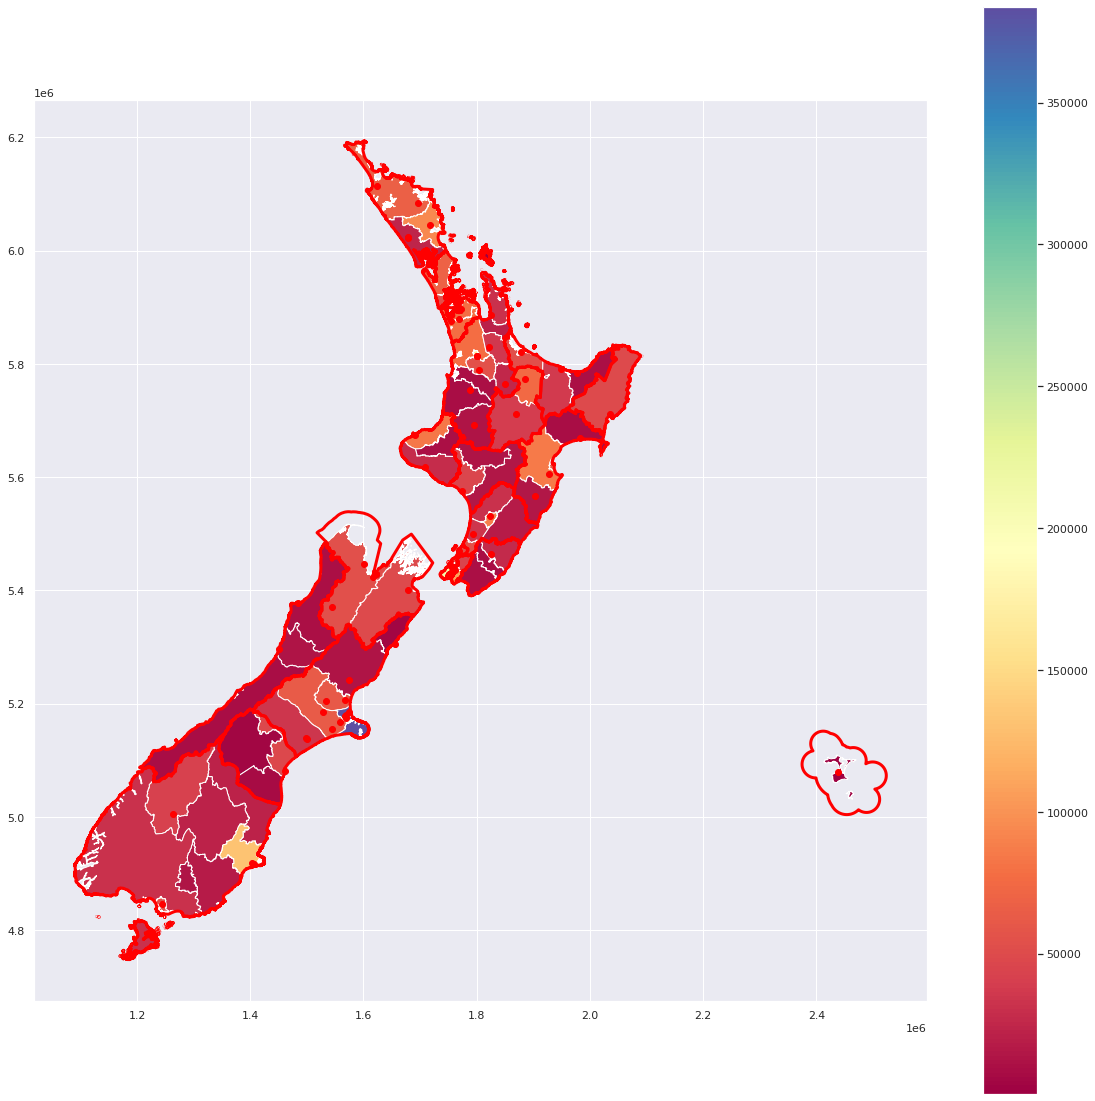

In [ ]:
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")

[1704081.5934     5838535.95349979 1806275.24620008 6001802.16870022]


(5838535.953499794, 6001802.168700218)

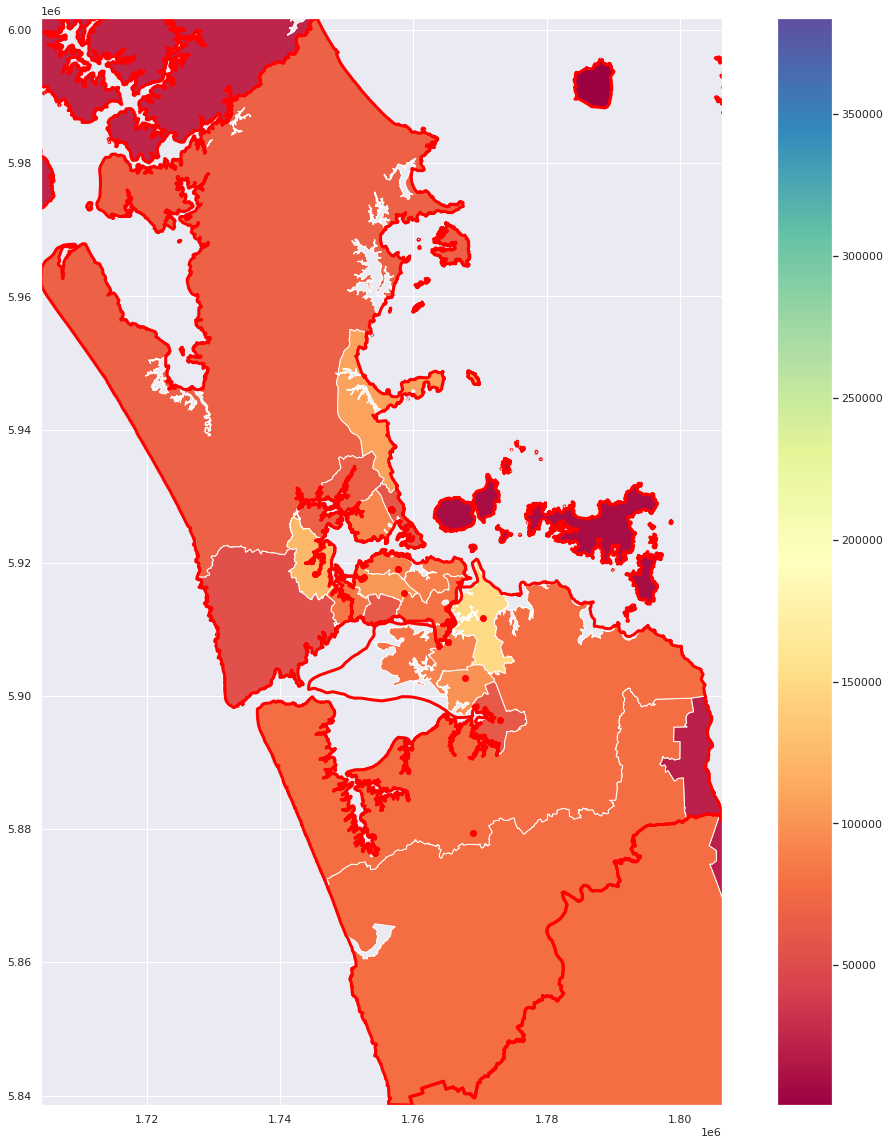

In [ ]:
AKL_bounds = DHB[DHB.DHB2015_Name.isin(["Counties Manukau", "Waitemata"])].total_bounds
print(AKL_bounds)
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
ax.set_xlim(AKL_bounds[0], AKL_bounds[2])
ax.set_ylim(AKL_bounds[1], AKL_bounds[3])

In [ ]:
DHB["TALBs"] = DHB.geometry.progress_apply(
    lambda poly: ",".join(
        TALB.TALB2021_V1_00_NAME[TALB.representative_point().intersects(poly)]
    )
)
with pd.option_context('display.max_colwidth', None):
    display(DHB[["DHB2015_Name", "TALBs"]])

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Name,TALBs
0,Northland,"Far North District,Whangarei District,Kaipara District"
1,Waitemata,"Rodney Local Board Area,Hibiscus and Bays Local Board Area,Upper Harbour Local Board Area,Kaipātiki Local Board Area,Devonport-Takapuna Local Board Area,Henderson-Massey Local Board Area,Waitākere Ranges Local Board Area"
2,Auckland,"Aotea/Great Barrier Local Board Area,Waiheke Local Board Area,Waitematā Local Board Area,Whau Local Board Area,Albert-Eden Local Board Area,Puketāpapa Local Board Area,Ōrākei Local Board Area,Maungakiekie-Tāmaki Local Board Area"
3,Counties Manukau,"Howick Local Board Area,Māngere-Ōtāhuhu Local Board Area,Ōtara-Papatoetoe Local Board Area,Manurewa Local Board Area,Papakura Local Board Area,Franklin Local Board Area"
4,Waikato,"Thames-Coromandel District,Hauraki District,Waikato District,Matamata-Piako District,Hamilton City,Waipa District,Ōtorohanga District,South Waikato District,Waitomo District,Ruapehu District"
5,Lakes,"Taupo District,Rotorua District"
6,Bay of Plenty,"Western Bay of Plenty District,Tauranga City,Whakatane District,Kawerau District,Ōpōtiki District"
7,Tairawhiti,Gisborne District
8,Taranaki,"New Plymouth District,Stratford District,South Taranaki District"
9,Hawke's Bay,"Wairoa District,Hastings District,Napier City,Central Hawke's Bay District"


In [ ]:
def get_DHB_pop(poly):
    return TALB.loc[TALB.representative_point().intersects(poly), cols].sum()
result = DHB.geometry.progress_apply(get_DHB_pop)
DHB = pd.concat([DHB, result], axis='columns')
DHB

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,66300.0,65700.0,226800.0,147.1,39100.0,56700.0,68400.0,67100.0,231300.0,148.2
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,252500.0,155400.0,775100.0,294.3,127800.0,249200.0,264300.0,168200.0,809400.0,298.4
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,226460.0,112450.0,686180.0,347.7,89660.0,260580.0,248410.0,119650.0,718400.0,355.6
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,237900.0,134800.0,746400.0,236.3,135700.0,244100.0,249000.0,146200.0,774900.0,241.4
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,167850.0,132190.0,562780.0,468.9,97040.0,169260.0,174120.0,138900.0,579220.0,477.0
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,38200.0,31900.0,127800.0,90.6,21600.0,35300.0,39000.0,32600.0,128600.0,91.9
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,94260.0,88820.0,315410.0,239.9,50930.0,82910.0,96950.0,92840.0,323630.0,244.8
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,16500.0,13100.0,55000.0,43.4,10400.0,14500.0,16900.0,13400.0,55200.0,44.1
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,40450.0,36250.0,137150.0,134.6,23450.0,37050.0,40800.0,37250.0,138400.0,135.2
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,59730.0,53950.0,199530.0,187.4,33670.0,51940.0,61190.0,55310.0,201960.0,190.1


Text(0.5, 1.0, 'Population by DHB in 2018')

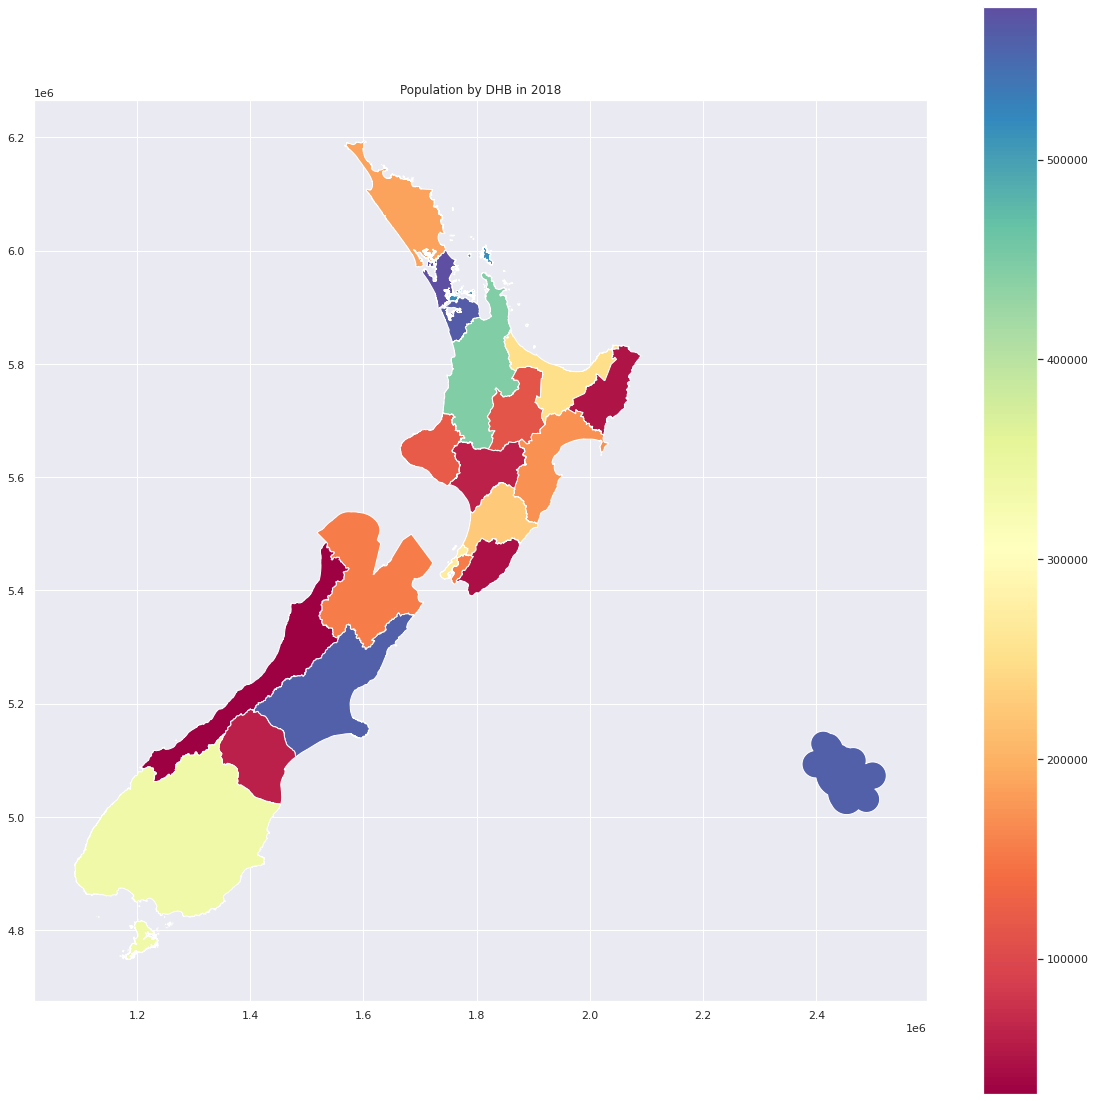

In [ ]:
ax = DHB.plot(column="pop_2018_total", legend=True, cmap="Spectral")
ax.set_title("Population by DHB in 2018")

In [ ]:
# Load all hospital discharge data from 2013-2019 into one data frame
discharges = []
for f in glob("input/hospital_discharges/*"):
    print(f)
    try:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    except KeyError:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_Data/PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    df.DHB.replace("Midcentral", "MidCentral", inplace=True)
    discharges.append(df)
discharges = pd.concat(discharges)
discharges

input/hospital_discharges/pubfund2016_17data.zip
input/hospital_discharges/pubfund2015_16data.zip
input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip
input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip
input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip
input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip


,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
0,2016/17,Counties Manukau,Pacific,Male,65-69,A00,A00 Cholera,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
1,2016/17,Auckland,Maori,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
2,2016/17,Auckland,Other,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
3,2016/17,Counties Manukau,Pacific,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
4,2016/17,Auckland,Maori,Male,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
409504,20182019,Wairarapa,Other,Male,55-59,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409505,20182019,Waikato,Other,Male,60-64,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409506,20182019,Northland,Maori,Female,00-04,Z82,Z82 Family history of certain disabilities and...,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409507,20182019,Northland,Maori,Male,25-29,Z84,Z84 Family history of other conditions,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN


In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(discharges.sort_values(by="Discharges", ascending=False).head(10))

,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
344935,2014/15,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2148,NaN
354531,2016/17,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2099,NaN
345001,2014/15,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2086,NaN
364182,2017/18,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2067,NaN
354593,2016/17,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2034,NaN
339132,2013/14,Waitemata,Other,Male,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2030,Z38
339066,2013/14,Waitemata,Other,Female,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2025,Z38
349182,2015/16,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1991,NaN
364244,2017/18,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1982,NaN
349244,2015/16,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1933,NaN


The most common discharge reason appears to be for childbirth

In [ ]:
discharges.groupby("DHB")["Discharges"].sum().sort_values(ascending=False)

DHB
Waitemata             924552
Counties Manukau      786348
Canterbury            737913
Waikato               686812
Auckland              638673
Southern              469828
Capital and Coast     393409
Bay of Plenty         388231
Northland             305592
Hawke's Bay           266436
MidCentral            258823
Hutt Valley           238268
Taranaki              211696
Nelson Marlborough    204635
Lakes                 181994
Whanganui             119105
South Canterbury       99051
Tairawhiti             75723
Wairarapa              74094
West Coast             56462
Unknown                34050
Name: Discharges, dtype: int64

Waitemata DHB had the most overall discharges from 2013-2019 

In [ ]:
# Looks like there's some variation in how chapters are recorded - let's make it a bit more consistent
chapters = discharges.ICDChapter.unique().tolist()
chapters

['Chapter  1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Cha

In [ ]:
target_chapters = chapters[40:49] + chapters[9:20]
target_chapters

['Chapter 1 Certain infectious and parasitic diseases',
 'Chapter 2 Neoplasms',
 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter 5 Mental and behavioural disorders',
 'Chapter 6 Diseases of the nervous system',
 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter 9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Chapter 18 S

In [ ]:
replacement_dict = {k: v for k,v in zip(chapters[:9], target_chapters[:9])}
replacement_dict.update({k: v for k,v in zip(chapters[20:40], target_chapters)})
replacement_dict

{'Chapter  1 Certain infectious and parasitic diseases': 'Chapter 1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms': 'Chapter 2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism': 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases': 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders': 'Chapter 5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system': 'Chapter 6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa': 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process': 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system': 'Chapter 9 Diseases of the circulatory system',
 'A00–B99 Certain in

In [ ]:
discharges.ICDChapter = discharges.ICDChapter.replace(replacement_dict)
discharges.ICDChapter.value_counts(dropna=False)

Chapter 19 Injury, poisoning and certain other consequences external causes                                  493542
Chapter 11 Diseases of the digestive system                                                                  200696
Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified           182502
Chapter 9 Diseases of the circulatory system                                                                 155399
Chapter 2 Neoplasms                                                                                          144812
Chapter 13 Diseases of the musculoskeletal system and connective tissue                                      143358
Chapter 10 Diseases of the respiratory system                                                                141126
Chapter 14 Diseases of the genitourinary system                                                              119736
Chapter 21 Factors influencing health status and contact with health ser

In [ ]:
discharges["ICDSubgroup"].value_counts(dropna=False).head(20)

S00–S09 Injuries to the head                                                            90762
Z40–Z54 Persons encountering health services for specific procedures and health care    63054
S60–S69 Injuries to the wrist and hand                                                  57905
I30–I52 Other forms of heart disease                                                    45265
R50–R69 General symptoms and signs                                                      44658
S80–S89 Injuries to the knee and lower leg                                              42575
J09–J18 Influenza and pneumonia                                                         37131
L00–L08 Infections of the skin and subcutaneous tissue                                  34612
T80–T88 Complications of surgical and medical care, not elsewhere classified            34321
R00–R09 Symptoms and signs involving the circulatory and respiratory systems            32782
K55–K64 Other diseases of intestines                        

In [ ]:
discharges["ICDThreeChar"].value_counts(dropna=False).head(20)

S06 Intracranial injury                                29367
Z50 Care involving use of rehabilitation procedures    27225
S82 Fracture of lower leg, including ankle             26338
S52 Fracture of forearm                                23616
L03 Cellulitis                                         23534
S62 Fracture at wrist and hand level                   19440
S01 Open wound of head                                 18676
J18 Pneumonia, organism unspecified                    16995
S42 Fracture of shoulder and upper arm                 16777
S09 Other and unspecified injuries of head             15398
R55 Syncope and collapse                               15338
S61 Open wound of wrist and hand                       14453
R10 Abdominal and pelvic pain                          14000
R07 Pain in throat and chest                           13648
S02 Fracture of skull and facial bones                 12906
N39 Other disorders of urinary system                  12753
I21 Acute myocardial inf

In [ ]:
discharges.FinancialYear.value_counts(dropna=False)

20182019    409509
2017/18     377960
2016/17     368295
2015/16     362851
2014/15     358697
2013/14     352666
Name: FinancialYear, dtype: int64

In [ ]:
discharges["year"] = discharges.FinancialYear.astype(str).str.slice(stop=4)
discharges.year.value_counts(dropna=False)

2018    409509
2017    377960
2016    368295
2015    362851
2014    358697
2013    352666
Name: year, dtype: int64

In [ ]:
discharge_years = discharges.year.unique()
discharge_years

array(['2016', '2015', '2013', '2014', '2017', '2018'], dtype=object)

In [ ]:
# Restructure discharge data so we have one row per DHB, and separate chapter discharge data in columns
rows = []
for d in tqdm(discharges.DHB.unique()):
    row = {"DHB": d}
    discharges_for_dhb = discharges[discharges.DHB == d]
    for year in sorted(discharges.year.unique()):
        discharges_for_year = discharges_for_dhb[discharges_for_dhb.year == year]
        for chapter in target_chapters:
            new_col = f"discharges_{year}_{chapter}"
            value = discharges_for_year.Discharges[discharges_for_year.ICDChapter == chapter].sum()
            row[new_col] = value
    rows.append(row)
discharges = pd.DataFrame(rows)
discharges

  0%|          | 0/21 [00:00<?, ?it/s]

,DHB,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
1,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
2,Hawke's Bay,1223,3068,459,866,810,911,1314,325,3495,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692
3,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
4,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,3766,893,2419,2211,3637,606,290,5018,4628,4500
5,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
6,Whanganui,658,1582,141,409,364,463,264,122,1610,...,2003,511,1289,1167,1350,218,113,2307,2357,1500
7,Hutt Valley,1166,2449,584,763,832,921,665,366,2667,...,4227,1199,2070,1953,3415,639,270,5238,4548,3828
8,Lakes,837,1745,552,550,610,683,632,320,2132,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
9,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,10511,2696,8102,6404,11841,2171,847,9728,14191,17704


In [ ]:
discharges = discharges.set_index("DHB")

In [ ]:
DHB = DHB.merge(discharges, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,5980,1206,2265,2182,3516,672,314,6104,5601,5415
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,7557,1412,3660,3133,4739,1006,433,7426,7540,6003
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1274,446,623,673,903,179,119,1376,1424,1693
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3465,913,2694,1661,2626,622,178,5475,4076,3601
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692


In [ ]:
header = []
for k in ["Total households", "median", "<$20K", "$20K-$30K", "$30K-$50K",
            "$50K-$70K", "$70K-$100K", "$100K-$150K", ">$150K", "Total households stated", "Not stated"]:
    header.append("income_2013_" + k)
    header.append("income_2018_" + k)
header = ["area"] + header
income = pd.read_excel("input/total_household_income_2013_2018_census_by_DHB.xlsx",
                        skiprows=5,
                        names=header,
                        usecols="A,C:X",
                        index_col=0,
                        nrows=20)
income[income.columns[income.columns!="area"]]
income

,income_2013_Total households,income_2018_Total households,income_2013_median,income_2018_median,income_2013_<$20K,income_2018_<$20K,income_2013_$20K-$30K,income_2018_$20K-$30K,income_2013_$30K-$50K,income_2018_$30K-$50K,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
area,,,,,,,,,,,,,,,,,,,,,
Northland,58944,64251,46900,57000,7623,7248,7131,7617,10395,10995,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
Waitemata,181143,193440,75800,94000,13437,12399,13971,13482,23754,21171,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
Auckland,153363,159009,80100,97900,14766,13647,9990,9948,16998,15324,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
Counties Manukau,140523,150702,73500,90100,11328,11289,9774,9987,17217,16431,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
Waikato,133578,144243,58900,68500,13656,12924,13401,14115,21609,21543,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
Lakes,37086,38886,55900,65500,3756,3297,3732,3849,6111,5907,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
Bay of Plenty,79299,87105,54600,67200,7980,6804,8769,9201,14274,13821,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
Tairawhiti,15993,16410,50500,57900,1950,1812,1755,1947,2661,2712,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
Taranaki,43080,45306,58400,63500,4377,4329,4545,5076,6939,7353,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982


<AxesSubplot:xlabel='area'>

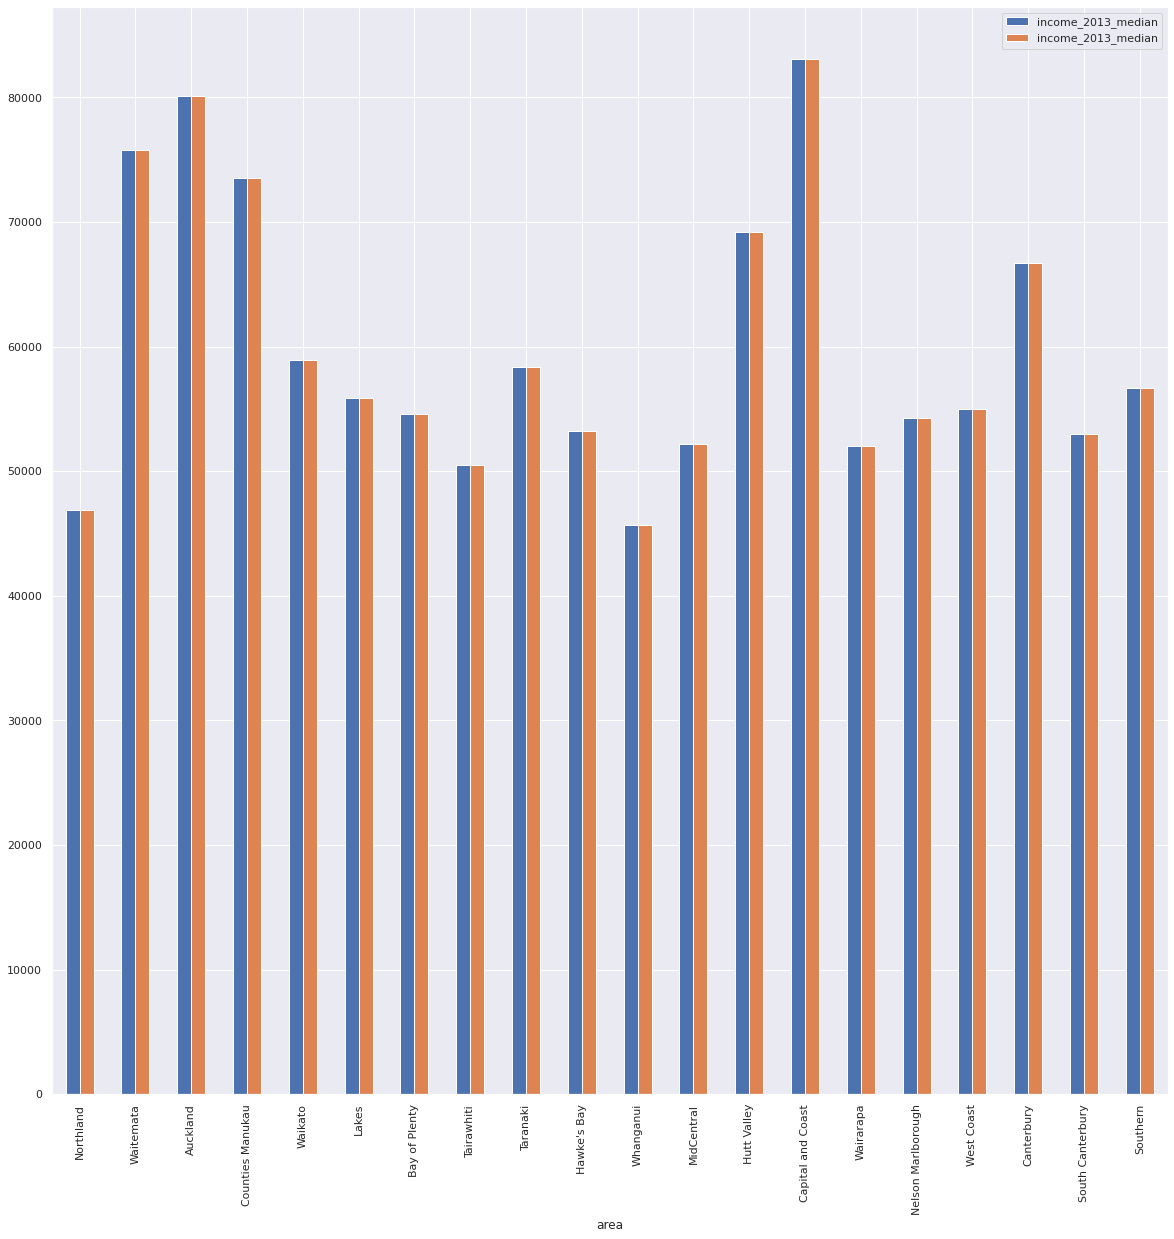

In [ ]:
income[["income_2013_median", "income_2013_median"]].plot(kind="bar")

In [ ]:
DHB = DHB.merge(income, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,8745,9366,5964,9639,3102,6003,48687,55764,8919,4440


In [ ]:
print(DHB.columns.tolist())

['DHB2015_Code', 'DHB2015_Name', 'Shape_Length', 'geometry', 'TALBs', 'pop_1996_0-14', 'pop_1996_15-39', 'pop_1996_40-64', 'pop_1996_65+', 'pop_1996_total', 'pop_1996_median age', 'pop_2001_0-14', 'pop_2001_15-39', 'pop_2001_40-64', 'pop_2001_65+', 'pop_2001_total', 'pop_2001_median age', 'pop_2006_0-14', 'pop_2006_15-39', 'pop_2006_40-64', 'pop_2006_65+', 'pop_2006_total', 'pop_2006_median age', 'pop_2013_0-14', 'pop_2013_15-39', 'pop_2013_40-64', 'pop_2013_65+', 'pop_2013_total', 'pop_2013_median age', 'pop_2018_0-14', 'pop_2018_15-39', 'pop_2018_40-64', 'pop_2018_65+', 'pop_2018_total', 'pop_2018_median age', 'pop_2023_0-14', 'pop_2023_15-39', 'pop_2023_40-64', 'pop_2023_65+', 'pop_2023_total', 'pop_2023_median age', 'pop_2028_0-14', 'pop_2028_15-39', 'pop_2028_40-64', 'pop_2028_65+', 'pop_2028_total', 'pop_2028_median age', 'pop_2033_0-14', 'pop_2033_15-39', 'pop_2033_40-64', 'pop_2033_65+', 'pop_2033_total', 'pop_2033_median age', 'pop_2038_0-14', 'pop_2038_15-39', 'pop_2038_40-64

In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)

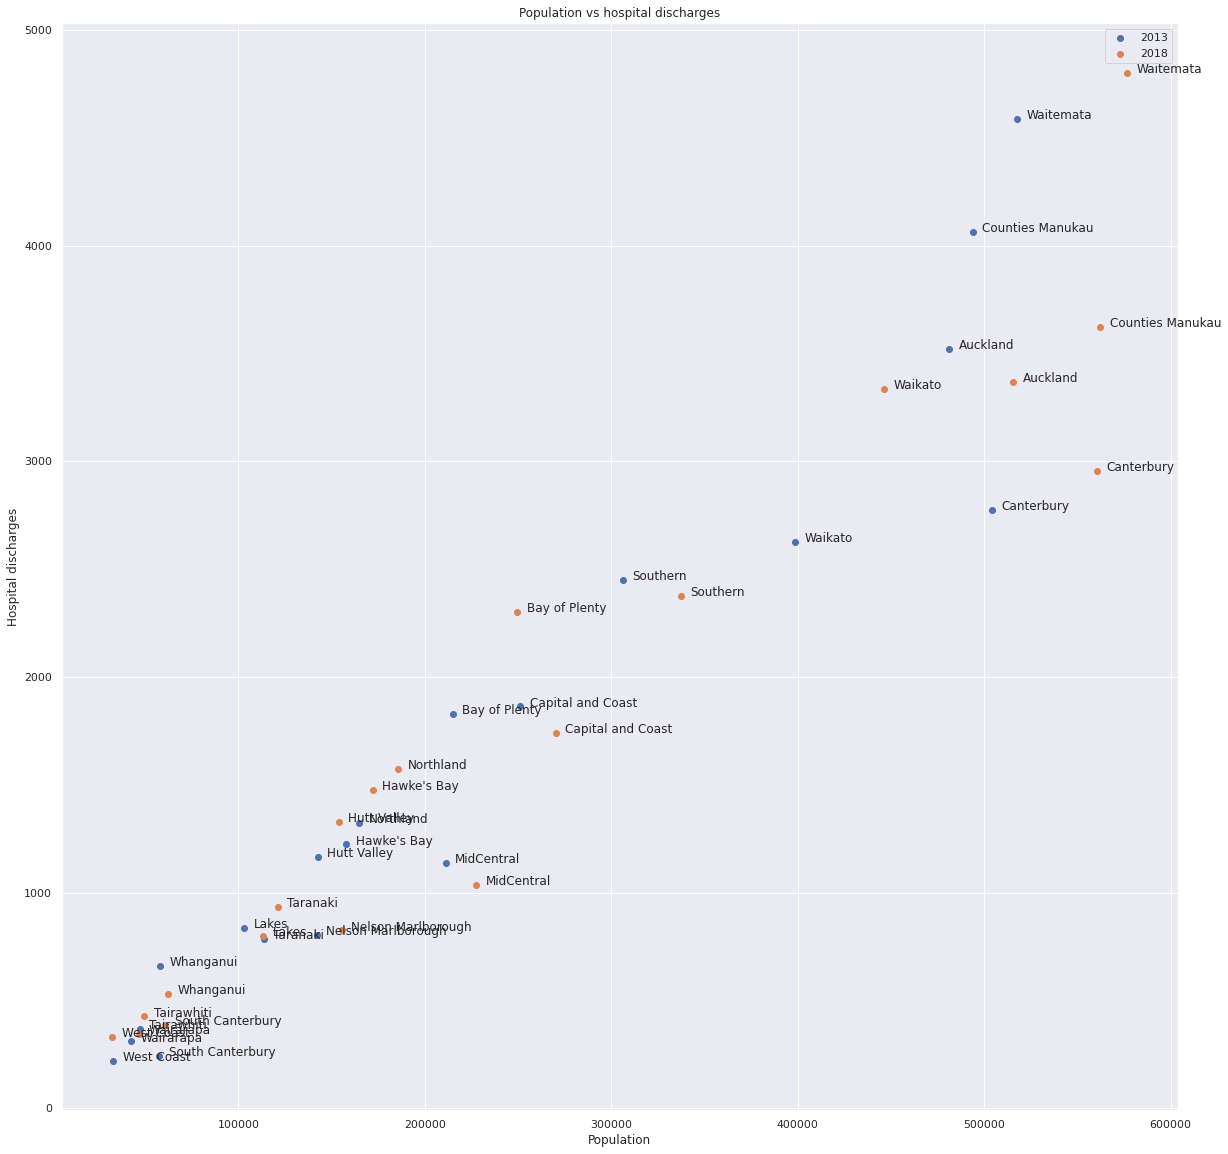

In [ ]:
plt.scatter(DHB.pop_2013_total, DHB["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], label="2013")
plt.scatter(DHB.pop_2018_total, DHB["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], label="2018")
for i, d in DHB.iterrows():
    plt.text(d.pop_2013_total + 5e3, d["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
    plt.text(d.pop_2018_total + 5e3, d["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
plt.xlabel("Population")
plt.ylabel("Hospital discharges")
plt.title("Population vs hospital discharges")
plt.legend()

This looks pretty linearly correlated, so a linear model should be able to predict this nicely

# Train some linear models

In [ ]:
def get_data_for_year(year, total_pop_only = False, include_DHB_code = True, income=None):
    year = str(year)
    x_cols = []
    if include_DHB_code:
        x_cols.append("DHB2015_Code")
    if total_pop_only:
        x_cols.append(f"pop_{year}_total")
    else:
        x_cols.extend(list(DHB.columns[DHB.columns.str.contains(f"pop_{year}")]))
    if income == "median":
        x_cols.append(f"income_{year}_median")
    elif income == "all":
        x_cols.extend([c for c in DHB.columns if c.startswith(f"income_{year}") and ("median" in c or "$" in c)])
    y_cols = list(DHB.columns[DHB.columns.str.contains(f"discharges_{year}")])
    x = DHB[x_cols]
    x.columns = x.columns.str.replace(year, "")
    if y_cols:
        y = DHB[y_cols]
        y.columns = target_chapters
        y.index = DHB.DHB2015_Name
    else:
        y = "?"
    return x,y

x_train, y_train = get_data_for_year(2013)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
x_test, y_test = get_data_for_year(2018)
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}\n")

x_train shape: (20, 7), y_train shape: (20, 20)
x_test shape: (20, 7), y_test shape: (20, 20)



In [ ]:
# ExtraTreesRegressor has the best score
model = estimator=sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_train, y_train)
print(f"{model} score: {model.score(x_test, y_test)}")
print(f"Feature importances:")
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

ExtraTreesRegressor() score: 0.8526593094422141
Feature importances:


{'DHB2015_Code': 0.01081842648734801,
 'pop__0-14': 0.30413817482096817,
 'pop__15-39': 0.15078108027457165,
 'pop__40-64': 0.21101692349025977,
 'pop__65+': 0.06292808015023059,
 'pop__total': 0.248669735916531,
 'pop__median age': 0.011647578860090883}

In [ ]:
pred = pd.DataFrame(model.predict(x_test))
pred.columns = target_chapters
pred.index = DHB.DHB2015_Name
pred

,Chapter 1 Certain infectious and parasitic diseases,Chapter 2 Neoplasms,Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"Chapter 4 Endocrine, nutritional and metabolic diseases",Chapter 5 Mental and behavioural disorders,Chapter 6 Diseases of the nervous system,Chapter 7 Diseases of the eye and adnexa,Chapter 8 Diseases of the ear and mastoid process,Chapter 9 Diseases of the circulatory system,Chapter 10 Diseases of the respiratory system,Chapter 11 Diseases of the digestive system,Chapter 12 Diseases of the skin and subcutaneous tissue,Chapter 13 Diseases of the musculoskeletal system and connective tissue,Chapter 14 Diseases of the genitourinary system,"Chapter 15 Pregnancy, childbirth and the puerperium",Chapter 16 Certain conditions originating in the perinatal period,"Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","Chapter 19 Injury, poisoning and certain other consequences external causes",Chapter 21 Factors influencing health status and contact with health services
DHB2015_Name,,,,,,,,,,,,,,,,,,,,
Northland,1323.12,3668.62,554.70,1133.06,1387.60,1056.66,1599.42,407.16,3856.16,3317.50,4577.68,1200.26,2181.50,2198.86,3493.24,725.06,309.08,4222.96,4686.64,4232.36
Waitemata,4437.29,8292.62,1770.39,2702.57,2770.66,3154.88,2550.71,1386.32,9595.85,8724.25,11472.75,3356.62,7492.83,7199.23,12026.65,1894.19,1195.66,17403.49,15782.94,16376.91
Auckland,3573.17,6318.69,1265.95,2340.50,2509.28,2626.65,2503.66,1198.02,7205.62,7255.22,8315.88,2800.83,5827.69,5765.74,10641.89,1583.05,928.49,11288.17,13018.15,15532.72
Counties Manukau,4221.79,7908.40,1681.83,2862.15,2564.10,3057.52,2539.89,1338.70,8860.41,9039.69,10743.61,3479.40,6973.37,6914.33,12550.49,2138.59,1209.26,14985.21,14691.68,16876.27
Waikato,2942.17,7392.18,1358.46,2271.02,2558.85,2841.18,2279.23,1060.97,7206.25,7240.65,8645.90,2300.08,5614.67,5056.61,10215.98,1569.24,838.01,10283.23,11612.74,17198.53
Lakes,838.08,2228.42,532.95,625.75,660.49,716.39,565.16,288.92,2314.37,1990.00,2762.29,681.72,1788.04,1382.45,2583.91,482.37,221.02,3691.90,2897.67,3490.39
Bay of Plenty,1978.78,3953.14,776.48,1347.25,1931.53,1824.70,1465.66,627.39,4812.05,4378.60,5585.94,1448.16,3842.81,3228.82,5448.97,877.46,538.60,6885.44,7047.41,6675.41
Tairawhiti,389.95,977.85,133.91,347.85,311.09,328.66,306.11,110.63,1044.24,999.67,1161.72,321.90,681.42,613.36,961.69,158.10,106.24,1055.23,1298.42,1549.39
Taranaki,801.21,2721.32,486.69,637.80,683.44,731.60,558.95,261.84,2449.29,1867.78,2824.18,621.43,1845.06,1490.23,2484.38,402.08,206.95,3816.81,3041.14,3790.57


Text(0.5, 1.0, 'Discharges by DHB and ICD chapter in 2018')

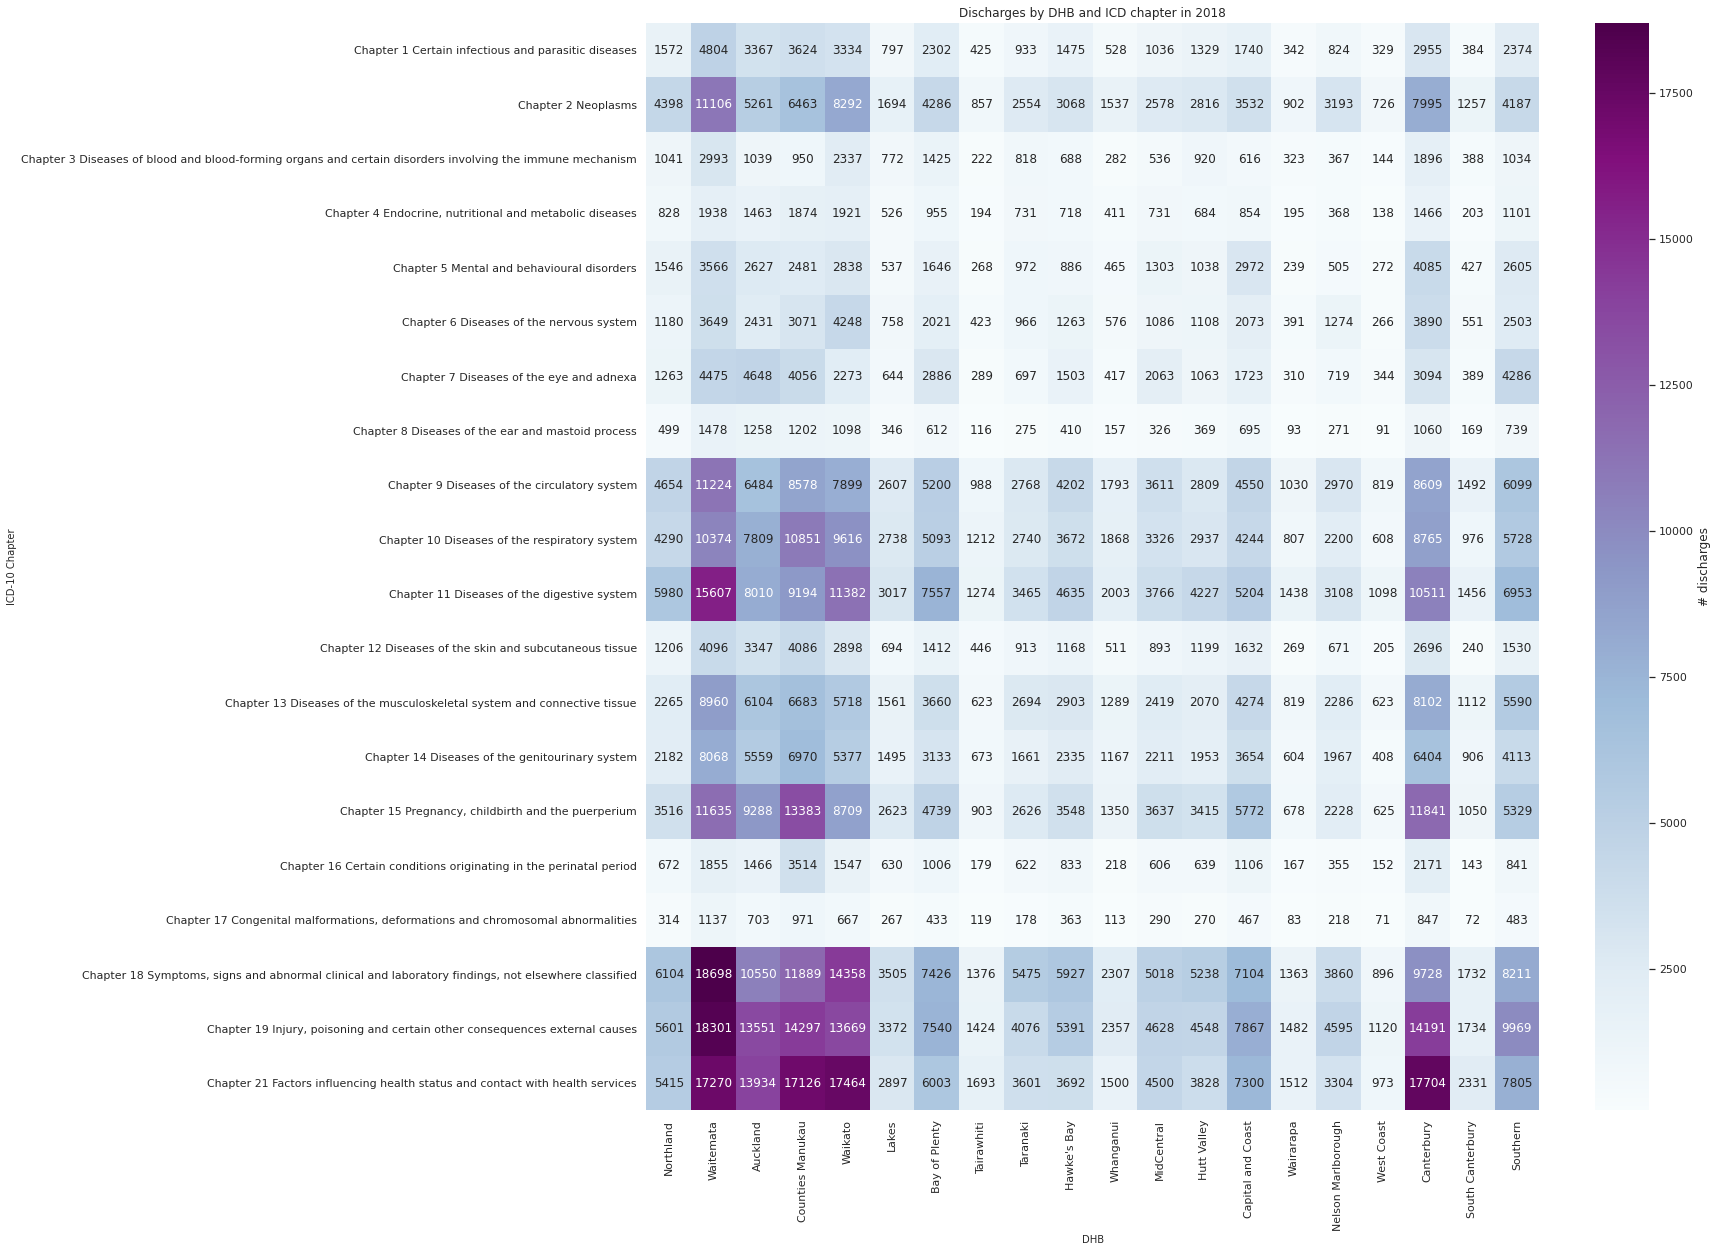

In [ ]:
seaborn.heatmap(y_test.T,
                cmap="BuPu",
                annot=True,
                fmt="g",
                cbar_kws={'label': '# discharges'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Discharges by DHB and ICD chapter in 2018")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

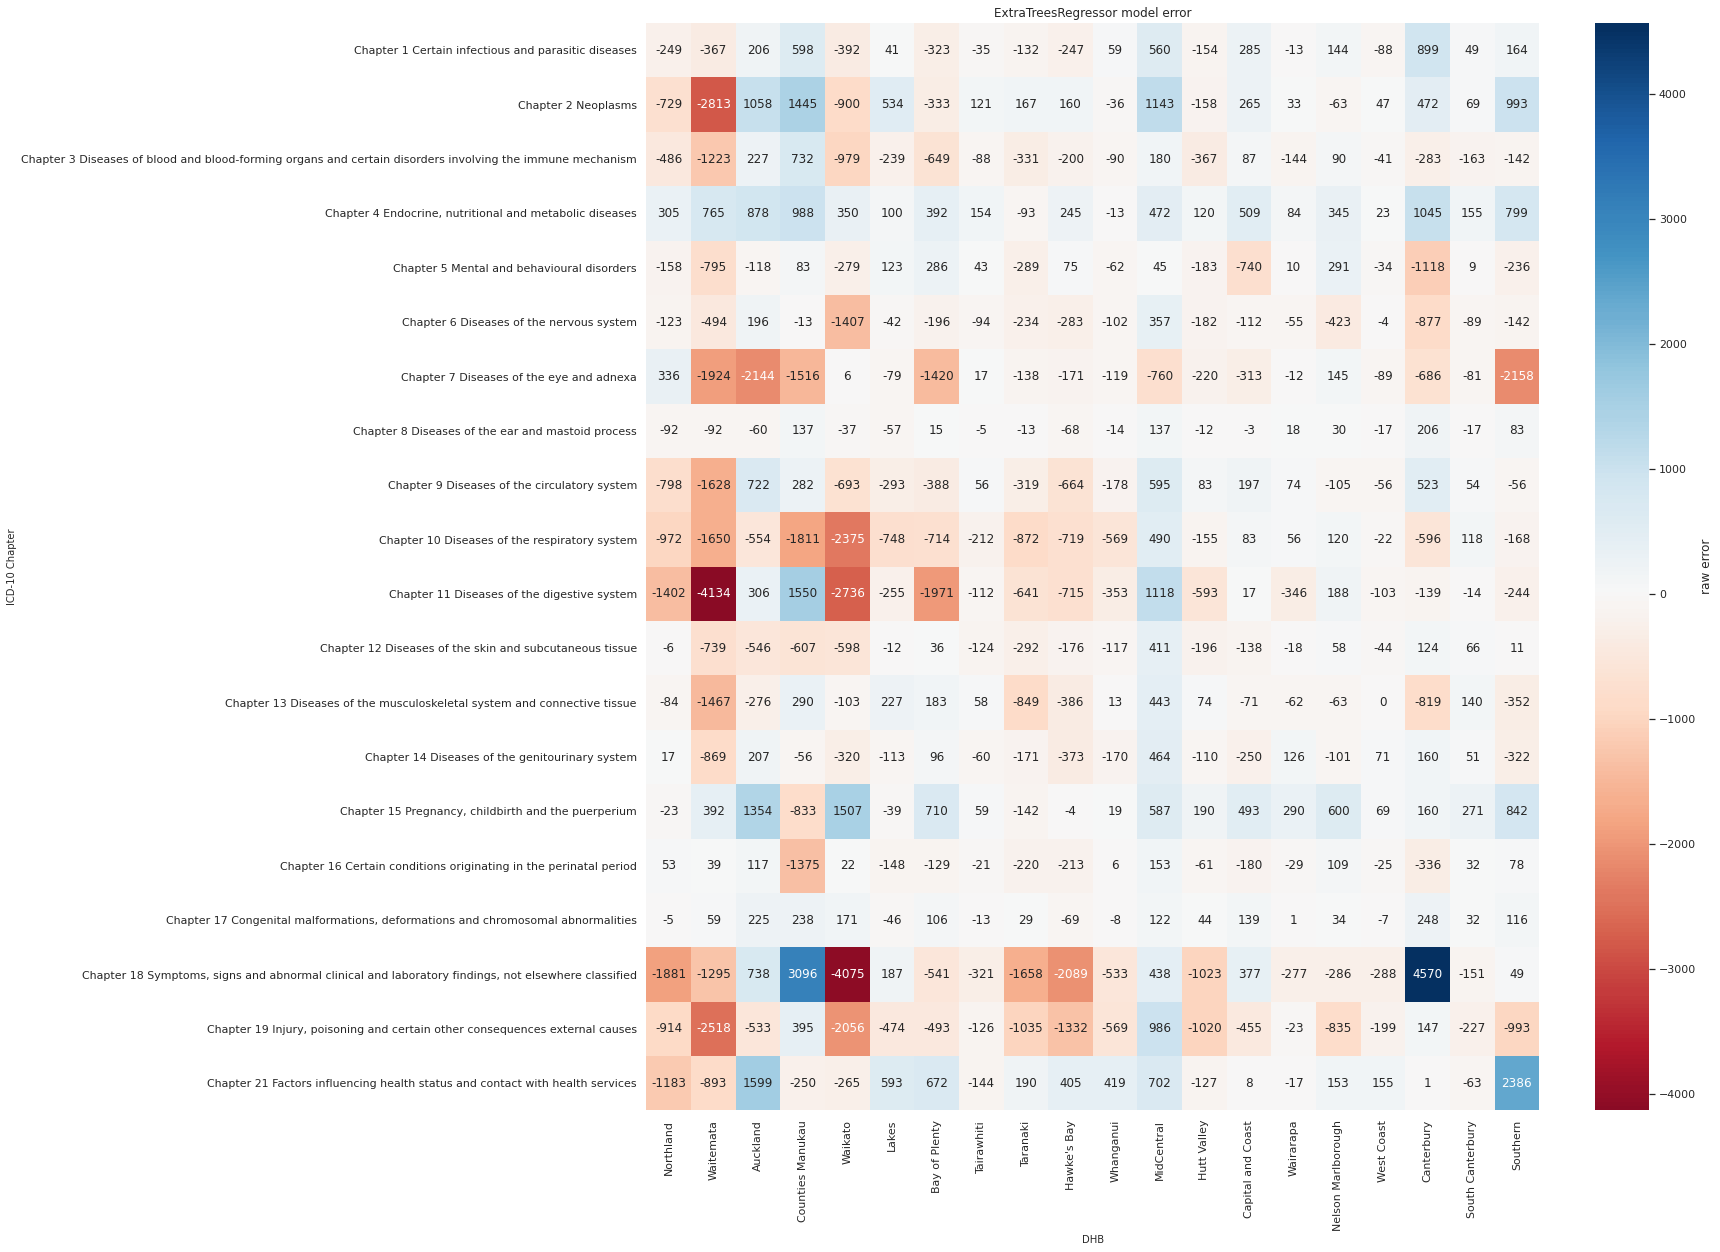

In [ ]:
err = pred - y_test
seaborn.heatmap(err.T,
                center=0,
                cmap="RdBu",
                annot=True,
                fmt=".0f",
                cbar_kws={'label': 'raw error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

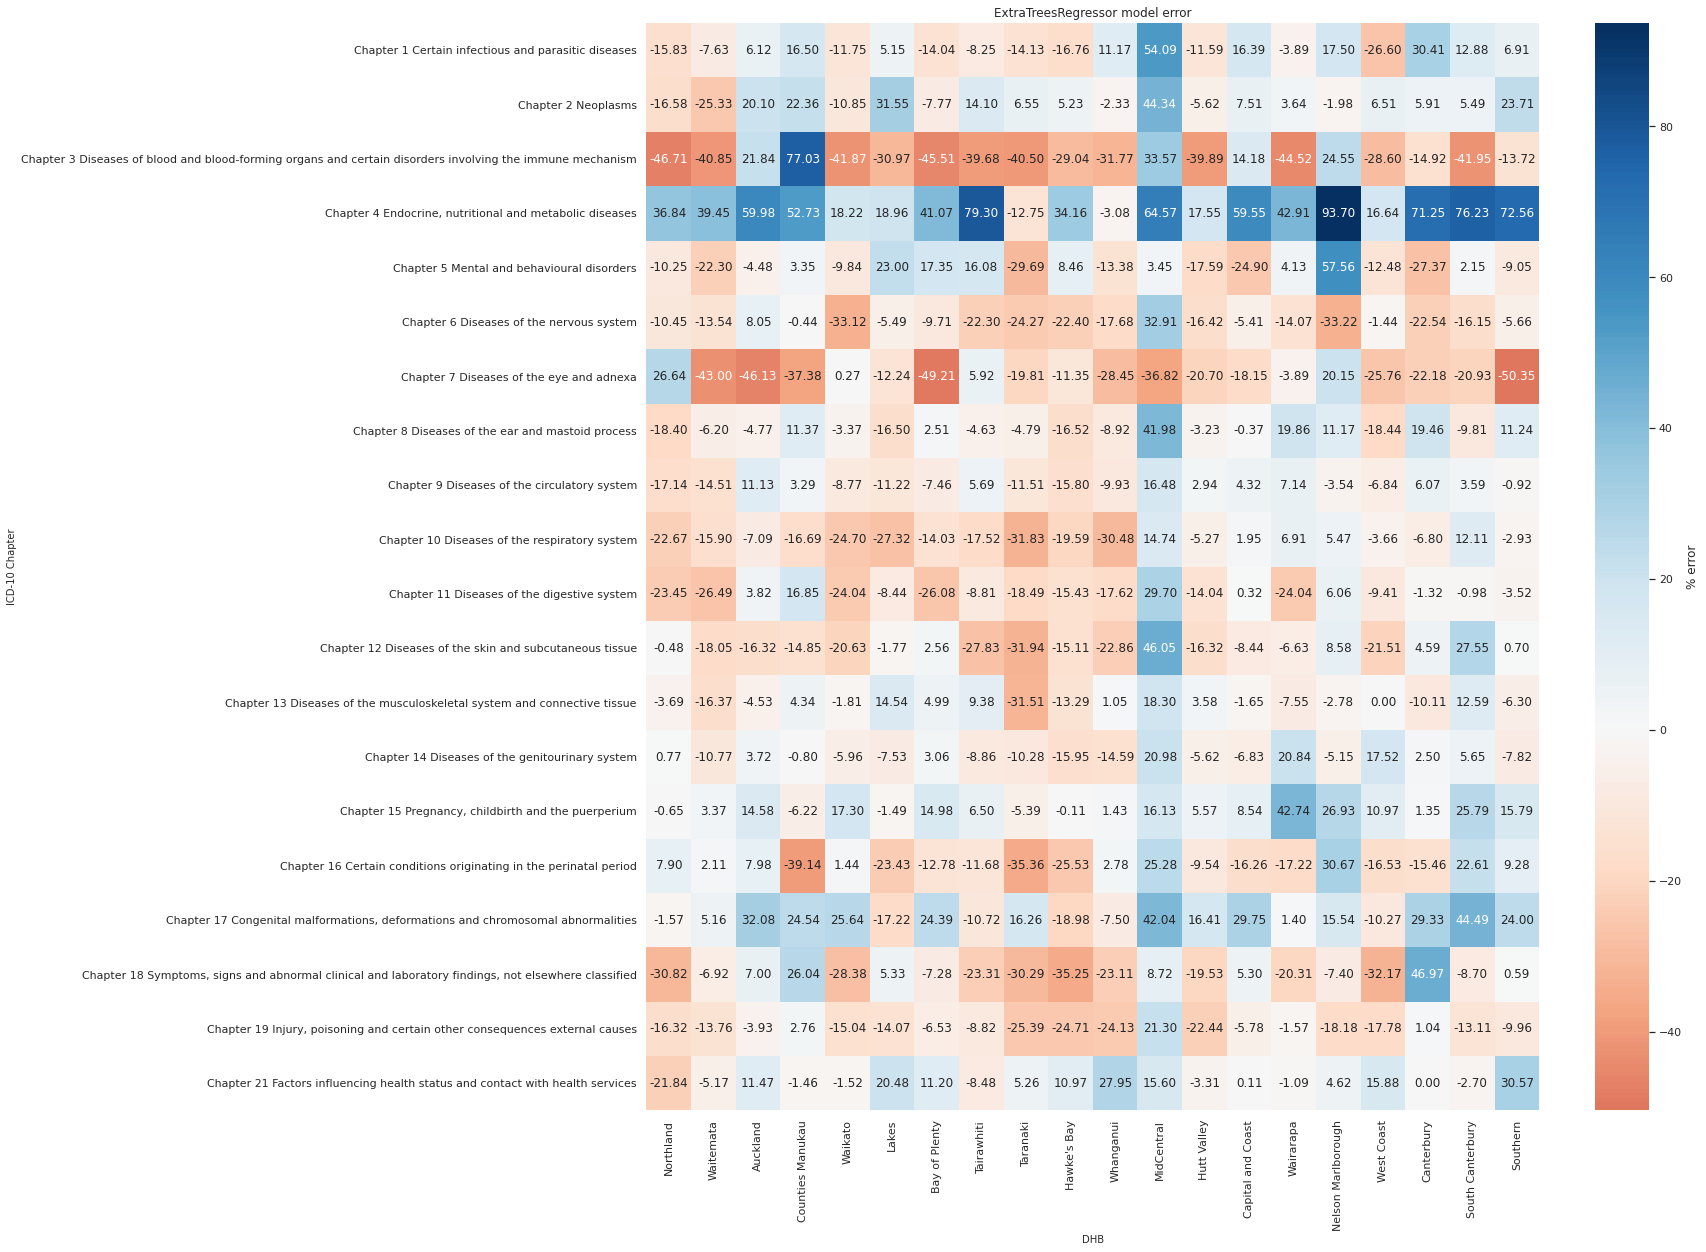

In [ ]:
pct_err = ((pred - y_test) / y_test) * 100
seaborn.heatmap(pct_err.T,
                cmap="RdBu",
                center=0,
                annot=True,
                fmt=".2f",
                cbar_kws={'label': '% error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

In [ ]:
# Now fit the model on both 2013 and 2018 data, to predict the future
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(x_train2.shape, y_train2.shape)

model.fit(x_train2, y_train2)
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

(40, 7) (40, 20)


{'DHB2015_Code': 0.02174749235172488,
 'pop__0-14': 0.23051310714760365,
 'pop__15-39': 0.15147711420329035,
 'pop__40-64': 0.24594976409066405,
 'pop__65+': 0.07271671923002646,
 'pop__total': 0.2521082347353785,
 'pop__median age': 0.025487568241312118}

In [ ]:
future_years = ['2023', '2028', '2033', '2038', '2043', '2048']
for year in future_years:
    x_test, _ = get_data_for_year(year)
    pred = pd.DataFrame(model.predict(x_test))
    pred.columns = [f"predicted_discharges_{year}_{k}" for k in target_chapters]
    DHB = pd.concat([DHB, pred], axis=1)

In [ ]:
cols = [k for k in DHB.columns if "discharges" in k.lower()]
DHB[["DHB2015_Name"] + cols].sort_values(by=f"predicted_discharges_2048_{target_chapters[0]}", ascending=False)

,DHB2015_Name,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
1,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,14071.20,3722.07,8394.83,7518.49,11499.36,1878.16,1068.19,16950.60,17047.93,17354.40
3,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,12649.92,3942.93,7851.53,7391.99,12093.03,2462.26,1028.54,15388.29,16288.60,17216.70
2,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,10921.87,3166.33,6910.62,6242.02,10529.21,1728.56,882.46,13305.00,14497.30,16747.07
4,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11187.49,2918.74,6902.28,6105.53,10662.18,1826.54,863.06,13337.38,14170.42,17939.68
17,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,11332.11,2903.75,8015.25,6582.32,11680.40,2043.61,905.16,11654.00,14711.75,17886.85
19,Southern,2450,4707,770,1819,2378,2227,2081,762,5858,...,7561.53,1714.85,5314.02,4132.57,6593.50,1041.07,581.06,9037.70,9944.83,10953.56
6,Bay of Plenty,1828,4103,894,1226,1399,1530,1476,498,4793,...,7164.77,1469.59,4514.28,3501.53,5248.95,947.49,496.90,7823.96,8316.03,7430.42
13,Capital and Coast,1863,3393,658,1195,2185,1857,1173,659,4324,...,5694.56,1442.48,4357.84,3448.79,5295.26,908.16,469.08,7166.01,7833.51,7144.62
0,Northland,1323,3746,541,1149,1499,1014,1723,420,3902,...,6050.01,1275.66,2735.95,2543.84,3915.48,754.47,362.27,6186.17,6064.24,5582.41
11,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,5362.74,1221.68,3101.63,2743.74,4367.33,794.07,384.11,6245.52,6110.44,5482.59


In [ ]:
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,6050.01,1275.66,2735.95,2543.84,3915.48,754.47,362.27,6186.17,6064.24,5582.41
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,14071.20,3722.07,8394.83,7518.49,11499.36,1878.16,1068.19,16950.60,17047.93,17354.40
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,10921.87,3166.33,6910.62,6242.02,10529.21,1728.56,882.46,13305.00,14497.30,16747.07
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,12649.92,3942.93,7851.53,7391.99,12093.03,2462.26,1028.54,15388.29,16288.60,17216.70
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11187.49,2918.74,6902.28,6105.53,10662.18,1826.54,863.06,13337.38,14170.42,17939.68
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3106.02,747.55,2038.04,1580.43,2582.17,542.51,222.55,4106.03,3542.14,3300.93
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,7164.77,1469.59,4514.28,3501.53,5248.95,947.49,496.90,7823.96,8316.03,7430.42
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1461.59,376.70,966.50,816.55,1057.52,185.92,101.62,1557.88,1608.42,1788.34
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3264.20,758.55,2327.17,1704.32,2601.21,499.78,209.35,4367.09,3812.45,3595.69
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4745.99,1152.44,2727.02,2336.25,3664.53,743.98,345.07,5407.43,5232.93,4359.25


In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)